C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


--- Training Fold 1 ---
Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8568 - loss: 0.4562 - val_accuracy: 0.9748 - val_loss: 0.0815
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9445 - loss: 0.1830 - val_accuracy: 0.9872 - val_loss: 0.0426
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9577 - loss: 0.1388 - val_accuracy: 0.9879 - val_loss: 0.0360
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9658 - loss: 0.1135 - val_accuracy: 0.9885 - val_loss: 0.0367
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9714 - loss: 0.0964 - val_accuracy: 0.9899 - val_loss: 0.0331
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.9739 - loss: 0.0881 - val_accuracy: 0.9903 - val_loss: 0.0326
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9749 - loss: 0.0817 - val_accuracy: 0.9922 - val_loss: 0.0249
Epoch 8/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 

C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Code\Digit-Recognition-Password-Lock\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL S

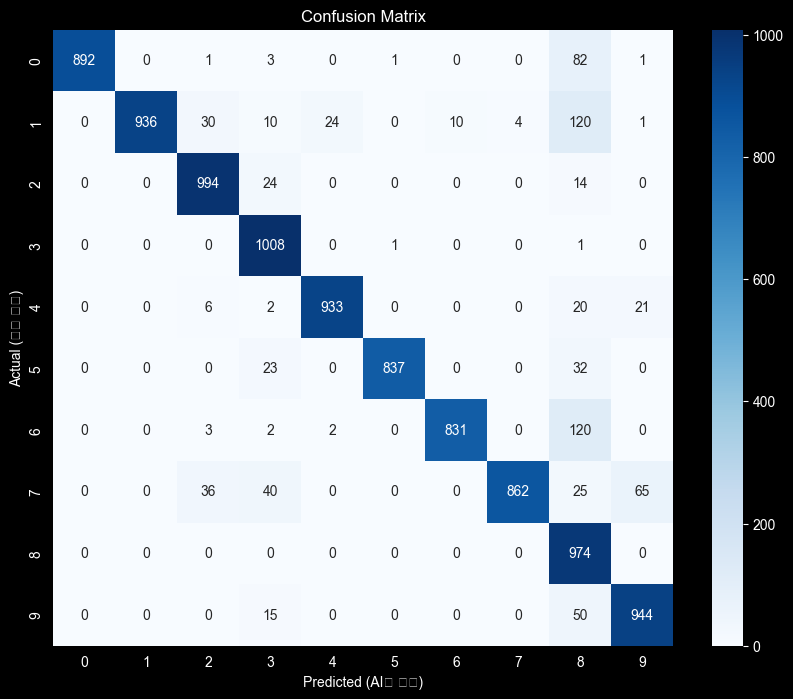

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       980
           1       1.00      0.82      0.90      1135
           2       0.93      0.96      0.95      1032
           3       0.89      1.00      0.94      1010
           4       0.97      0.95      0.96       982
           5       1.00      0.94      0.97       892
           6       0.99      0.87      0.92       958
           7       1.00      0.84      0.91      1028
           8       0.68      1.00      0.81       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.92     10000
   macro avg       0.94      0.92      0.92     10000
weighted avg       0.94      0.92      0.92     10000



In [2]:
# OpenCV 한테 숫자 줌 -> 그게 패스워드가됨 -> 그 패스워드가 맞는지 아닌지?
# import cv2 as cv
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 데이터 로드 및 전처리
# 1단계: 공부할 데이터 준비(교과서 정리)
# 먼저 AI에게 줄 교과서(MNIST 숫자 데이터)를 가져와서 읽기 좋게 다듬기
# 데이터 합치기(concaternate): 원래 훈련용과 테스트용이 나눠져 있던 7만장의 사진을 하나로 다 합치기. 왜냐하면 나중에 'K-Fold' 라는 방식으로 더 엄격하게 시험을 치르기 위해
# 정규화(/255.0): 컴퓨터는 0~255 사이의 큰 숫자보다 0~1 사이의 소수점 숫자를 훨씬 계산하기 편해함. 그래서 모든 픽셀값을 255로 나눠줌 (파일 1,2 에서 배운 MinMaxScaler의 원리)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_all = np.concatenate((x_train, x_test))
y_all = np.concatenate((y_train, y_test))

# 정규화 (MinMaxScaler 원리)
x_all = x_all.astype('float32') / 255.0
x_all = x_all.reshape(-1, 28, 28, 1)

# 데이터 증강 (Data Augmentation) - 얇은 글씨, 회전 대응
# 2단계: 데이터 증강(상상력 키워주기)
# 원리: 똑바른 숫자 1만 보여주는게 아니라, 약간 회전시키고(10도), 크기도 조절(0.9~1.1배) 하고, 옆으로 살짝 밀어서 보여줌
# 이유: 이렇게 하면 사용자가 숫자를 아주 얇게 쓰거나 삐딱하게 써도 AI가 "아 이건 내가 공부할 때 봤던 1의 변형된 모습이네!" 라고 알아챌 수 있음. 이 덕분에 openCV로 억지로 글자를 두껍게 깎지 않아도 됨
datagen = ImageDataGenerator(
        rotation_range=15,      # 최대 15도까지 회전 (기울어진 숫자 대비)
        width_shift_range=0.1,  # 가로로 10% 이동
        height_shift_range=0.1, # 세로로 10% 이동
        zoom_range=0.2,         # 20%까지 확대/축소 (멀리 있거나 가까운 숫자 대비)
        # shear_range=0.1,      # 비틀기 (필요시 추가)
        fill_mode='constant',   # 빈 공간은 검은색(0)으로 채움
        cval=0
)

# 3단계: CNN 모델 설계(AI의 시각지능 만들기)
# Conv2D(합성곱): 이미지의 특징(엣지, 곡선)을 찾아내는 레이어. 숫자의 꺾임이나 직선을 감지
# MaxPooling: 특징만 남기고 사진 크기를 줄여서 중요한 정보만 압축
# Flatten: 2차원 사진 데이터를 AI가 이해할 수 있게 1줄로 길게 펼침
# Dropout(0.3): 공부할 때 뇌 세포의 30%를 무작위로 쉬게 함. 특정 모양에만 집착하는 '과적합(암기)' 를 방지하고 스스로 원리를 깨우치게 만듦(파일 6)
# Softmax: 마지막에 10개 숫자(0~9) 중 정답일 확률을 다 합쳐서 100%가 되게 계산해줌
def create_model():
    model = keras.Sequential([
        # 최신 케라스 권장 방식: Input 객체를 명시적으로 선언
        # Keras 3에서는 "첫 번째 레이어에 입력 크기를 쑤셔넣지 말고, Input 레이어를 따로 써서 입구입을 명시해라"
        layers.Input(shape=(28, 28, 1)),

        # 첫 번째 합성곱 블록 (필터 32개, 레이어 중첩)
        layers.Conv2D(32, (3, 3), activation='relu', padding='name'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # 두 번째 합성곱 블록 (필터 64개로 확장 - 파라미터 증가)
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # 특징 추출 후 밀집층
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # 학습률 최적화
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

history_list = []

# K-Fold 교차 검증 (파일 5 기술)
# 4단계: K-Fold 교차 검증(엄격한 반복 시험)
# StratifiedKFold는 파일 5에서 강조된 "좋은 모델을 고르는 법"이다
# 방법: 전체 데이터를 5묶음으로 나눔. 4묶음으로 공부하고 1묶음으로 시험 보는 과정을 5번 반복
# 이유: 딱 한번 시험 봐서 우연히 성적이 잘 나온건지, 아니면 진짜 실력인지 확인하기 위해서이다. 이 과정을 거치면 어떤 상황에서도 잘 작동하는 "강력한 모델"이 만들어진다
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
for train_index, val_index in skf.split(x_all, y_all):
    print(f'--- Training Fold {fold_no} ---')
    train_x, val_x = x_all[train_index], x_all[val_index]
    train_y, val_y = y_all[train_index], y_all[val_index]

    model = create_model()

    # 학습 실행 및 기록 저장
    history = model.fit(
        datagen.flow(train_x, train_y, batch_size=64),
        epochs=10, # 발표용은 5~10회 추천
        validation_data=(val_x, val_y),
        verbose=1 # verbose=0(침묵모드): 학습하는 동안 화면에 아무것도 안 나옴. verbose=1(진행바 모드): 진행 상황과 점수(정확도)가 실시간으로 출력됨
    )
    history_list.append(history)

    fold_no += 1
    if fold_no > 2: break # 시간 관계상 Z-Fold 까지만 예시로 진행

model.save("advanced_digit_cnn.keras")

# 테스트 데이터로 예측
# 성능 평가
# Confusion Matrix(오차 행렬): 가로-세로 표를 그려서 "AI가 1을 7로 헷갈려 하는지", "2를 3으로 헷갈려 하는지"를 한눈에 보여준다
# Precision(정밀도) & Recall(재현율)
# 정밀도: AI가 이건 1이야! 라고 했을 때 진짜 1일 확률
# 재현율: 실제 세상의 많은 1 중에서 AI가 몇개나 놓치지 않고 찾아냈는지의 비율
y_pred = np.argmax(model.predict(x_test.reshape(-1, 28, 28, 1)), axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted (AI의 예측)')
plt.ylabel('Actual (실제 정답)')
plt.title('Confusion Matrix')
plt.show()

# 정밀도(percision)와 재현율(recall)
# precision: AI가 "이건 1이야" 라고 말한 것 중 진짜 1인 비율
# recall: 실제 숫자 1들을 AI가 얼마나 놓치지 않고 찾아냈는가 하는 비율
print(classification_report(y_test, y_pred)) # Precision, Recall 출력

# OpenCV 침식/팽창은 원본 데이터를 강제로 변형시키지만, 저는 ImageDataGenerator를 통한 데이터 증강(Data Augmentation) 기법을 사용했습니다. 학습 과정에서 0.9배에서 1.1배까지 실시간으로 크기를 조절(Zoom)하며 학습시켰기 때문에, 모델은 선이 얇은 글씨와 굵은 글씨 모두를 '숫자의 특징'으로 학습하여 OpenCV 전처리 없이도 높은 일반화 성능을 가집니다.

In [ ]:
# OpenCV 한테 숫자 줌 -> 그게 패스워드가됨 -> 그 패스워드가 맞는지 아닌지?
# import cv2 as cv
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 가장 쉬운 세선화 코드 (morphologyEx 사용)
def get_skeleton(img):
    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    temp_img = img.copy()

    while True:
        # 1. 침식 연산으로 깎아냄
        eroded = cv2.erode(temp_img, element)
        # 2. 다시 팽창시켜서 원본과의 차이(뼈대 후보)를 찾음
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(temp_img, temp)
        # 3. 뼈대를 차곡차곡 합침
        skel = cv2.bitwise_or(skel, temp)
        temp_img = eroded.copy()

        if cv2.countNonZero(temp_img) == 0:
            break

    # 추출된 뼈대를 다시 AI가 보기 좋게 약간만 두껍게 만듦
    skel = cv2.dilate(skel, np.ones((2, 2), np.uint8), iterations=1)
    return skel

model = keras.models.load_model("advanced_digit_cnn.keras")

print(model.summary())

password = [1,2,3,4]
input_digits = []
status_message = "Capture 4 digits (Press 'C')"

cap = cv2.VideoCapture(0)
# 해상도 높이기
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
if not cap.isOpened():
    print("웹캡을 열 수 없습니다")
    exit()

while True:
    ret, frame = cap.read() # ret은 true와 false를 담음
    if not ret:
        print("프레임을 가져올 수 없습니다")
        break

    flip_frame = cv2.flip(frame, 1)
    height, width, _ = frame.shape # _는 color가 넘어옴
    center_x, center_y = width // 2, height // 2 # 프레임의 가운데가 찍힘

    # ROI 설정 (300*300)
    roi_size = 300
    roi_half = roi_size // 2
    roi = flip_frame[center_y - roi_half:center_y + roi_half, center_x - roi_half:center_x + roi_half]

    # ROI 의 가장자리 10픽셀을 잘라내기 (Border 제거)
    offset = 10
    roi_clean = roi[offset:-offset, offset:-offset]

    cv2.rectangle(flip_frame,
                  (center_x - roi_half, center_y - roi_half),
                  (center_x + roi_half, center_y + roi_half),
                  (0, 0, 255),
                  2)

    cv2.putText(flip_frame, f"Input: {input_digits}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
    cv2.putText(flip_frame, status_message, (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)

    cv2.imshow("Webcam", flip_frame)

    # 화면 캡처를 위한 키 값 받기
    key = cv2.waitKey(1) & 0xFF

    if key == ord('c' or 'C'):
        # 흑백이어야 하는 이유
        # AI 입장에서는 어디가 바탕이고, 어디가 글씨인가만 알면 된다
        # 색상 정보가 섞여있으면 AI는 이건 빨간색이라 3인가? 파란색이라 8인가? 라고 헷갈려 할 수 있다.
        # 그래서 색을 다 빼버리고(grayScale) 더 나아가 바탕은 검정, 글씨는 하양(이진화)로 극명하게 대비를 시켜주는 것이다
        # 1. 전처리 시작 (회색조 -> 블러)
        gray_image = cv2.cvtColor(roi_clean, cv2.COLOR_BGR2GRAY) # 이진화 하기 위해
        gray_image = np.flip(gray_image, 1)
        # cv2.imwrite("gray_image.png", gray_image)
        cv2.imshow("gray_image", gray_image)

        # Top-Hat 변환
        # 이미지의 배경(빛 번짐)을 제거하고 원하는 물체(숫자)만 도드라지게 만드는 기법, 이미지에서 조명흐름(밝기 변화)를 계산하여 이를 원본에서 뺀다. 배경의 그라데이션이나 큰 빛 덩어리를 지우고 숫자처럼 작은 특징만 남기는데 매우 강력하다.
        structuring_element = cv2.getStructuringElement(cv2.MORPH_RECT, (71, 71)) # 숫자의 굵기보다 큰 커널 권장
        background = cv2.morphologyEx(gray_image, cv2.MORPH_DILATE, structuring_element)
        cv2.imshow("background", background)

        normalized = cv2.divide(gray_image, background, scale=255)
        cv2.imshow("normalized", normalized)

        # clipLimit: 대비 제한 임계값(보통 2.0), tileGridSize: 타일 크기(보통 8*8)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced_gray = clahe.apply(gray_image)
        cv2.imshow("Clahe", enhanced_gray)

        # 전처리를 꼼꼼하게 했다?
        # 카메라로 숫자를 찍으면 조명 때문에 어둡게 나오기도 하고, 종이에 잡티가 있을 수도 있다. 이런 걸 그대로 주면 AI는 "잡티도 숫자의 일부인가?" 라고 착각한다.
        # 노이즈 제거(Blur): 지저분한 점들을 지워서 깨끗하게 만든다
        # 임계값 처리(Threshold): 어설픈 회색을 다 날리고 확실한 검정과 흰색으로 바꾼다
        # 침식/팽창(Erosion/Dilation): 사용자가 펜으로 숫자를 너무 얇게 썼다면, AI가 공부한 '통통한 숫자'들과 비슷해지도록 글씨 두께를 인위적으로 조절한다
        # 가우시안 블러가 5를 덜 끊어지게 함
        blur = cv2.GaussianBlur(enhanced_gray, (5, 5), 3) # 노이즈 제거
        # 블러 강도를 세게 주면 글자 테두리가 너무 뭉개져서 나중에 1과 2가 서로 달라붙을 수 있음
        # blur = cv2.medianBlur(gray_image, 5) # 빛 반사 잡음 제거를 위해 미디언 블러 사용 (필터 크기 5)
        # blur = cv2.bilateralFilter(gray_image, 9, 75, 75) # 9: 필터 크기, 75: 색 공간 표준편차, 75: 좌표 공간 표준편차
        cv2.imshow("blur", blur)
        # gaussian_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

        # 핵심: 적응형 이진화(adaptive thresholding)
        # 얇은 글자를 선명하게 살려냄
        # INV 를 써서 처음부터 배경을 검정색으로 만들기
        # 블록 사이즈를 11에서 21로 키워 큼직하게 잡기
        binary = cv2.adaptiveThreshold(blur,
                                       255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY_INV, 21, 5) # C 값을 7에서 5로 낮춰 더 민감하게 잡음

        cv2.imshow("binary1", binary)
        # _, otsu_thread = cv2.threshold(gaussian_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# 이진화
        # cv2.imshow("otsu_thread", otsu_thread) # 딱 숫자만 나오게 해야함 (손이 나올수도 있고.. 글자를 진하게 만들어야함), 영상 축소?, 전처리 해줘야함

        ### morph
        # kernal = np.ones((5, 5), np.uint8)
        kernel = np.ones((5, 5), np.uint8)
        # closed_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
        # processed_img = cv2.dilate(closed_img, kernel, iterations=2)
        processed_img = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2) # 다시 한번 깎기
        cv2.imshow("Debug_Processed", processed_img)

        # 숫자가 2개 붙어있으면 두 숫자가 만나 한 덩어리가 되어버릴 수 있다
        # erode_img = cv2.erode(otsu_thread, kernal, iterations=5)
        # erosion = cv2.erode(otsu_thread, kernal, iterations=5) # 글자가 두꺼워짐 - 배경이 흰색, 물체가 검은색이므로 침식을 해야함. 따라서 검은색이 퍼져나감
        # erode_img = cv2.morphologyEx(otsu_thread, cv2.MORPH_OPEN, kernel, iterations=3)
        # cv2.imshow("erode_img", erode_img)

        # 검은 배경에 흰 글씨 - mnist가 검은 배경에 흰 글자이다
        # processed_img = cv2.bitwise_not(erode_img)
        # RETR_EXTERNAL 대신 RETR_LIST 사용하면 거대한 테투리 안쪽에 있는 숫자들을 모두 찾아냄
        contours, _ = cv2.findContours(processed_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 시각화용 복사본 만들기 (원본 훼손 방지)
        contour_view = cv2.cvtColor(processed_img, cv2.COLOR_GRAY2BGR)

        # 모든 외곽선(contours)를 초록색(0, 255, 0)으로 그리기
        # -1은 모든 컨투어를 그리라는 뜻. 2는 선의 두께
        cv2.drawContours(contour_view, contours, -1, (0, 255, 0), 2)
        cv2.imshow("See_Contours", contour_view)

        # 이미지의 밝기 변화가 급격한곳만 추출
        # edges = cv2.Canny(gray_image, 100, 200)
        # cv2.imshow("Canny Edges", edges)

        digit_rects = []

        roi_h, roi_w = processed_img.shape
        print("roi_h : ", roi_h)
        print("roi_w : ", roi_w)

        roi_area = roi_h * roi_w
        print("roi_area : ", roi_area)

        digit_rects = []
        for cnt in contours:
            # 외곽선을 감싸는 사각형 좌표(x,y,w,h) 계산
            print("cnt: ", cnt)
            x, y, w, h = cv2.boundingRect(cnt)
            area = cv2.contourArea(cnt)
            print(x, y, w, h)
            print("area: ", area)
            print("roi_area * 0.9: ", roi_area * 0.9)

            # 너무 큰 덩어리 제거 (전체 면적의 60% 이상이면 테두리로 간주)
            if area > (roi_area * 0.9):
                continue

            # 면적 필터링 (너무 미세한 잡음 제거)
            if area < 300: continue

            # 경계면 필터링
            # 핸드폰 테두리나, 배경선은 보통 ROI의 끝까지 닿아있음
            # 상하좌우 끝에 닿아있는 덩어리는 숫자가 아니라고 판단하여 제외하기
            margin = 15
            print("x+w : ", x+w)
            print("roi_w - margin : ", roi_w - margin)
            print("y+h : ", y+h)
            print("roi_h - margin : ", roi_h - margin)
            if x < margin or y < margin or (x+w) > (roi_w - margin) or (y+h) > (roi_h - margin):
                continue

            # 종횡비(Aspect Ratio) 및 채우기 비율
            # 숫자는 가로 대비 세로가 적당히 김
            aspect_ratio = float(w) / h
            rect_area = w * h
            extent = float(area) / rect_area

            print("aspect_ratio: ", aspect_ratio)
            print("rect_area: ", rect_area)
            print("extent: ", extent)

            # 숫자의 일반적인 특징: 세로가 더 길고(0.1~0.9) 사각형 안을 어느정도 채우고 있음
            # if 0.1 < aspect_ratio < 1.2:
            digit_rects.append((x, y, w, h))
            # if 0.1 <aspect_ratio < 1.0 and extent > 0.2:
            #     digit_rects.append((x, y, w, h))
            #     cv2.rectangle(contour_view, (x, y), (x+w, y+h), (0, 255, 0), 2)
            # is_noise = x<5 or y<5 or (x+w)>(roi_w-5)or(y+h)>(roi_h-5)
            # 너무 큰 배경 덩어리(ROI의 80% 이상)과 너무 작은 노이즈 제거
            # if 10 < w < 250 and 20 < h < 250 and not is_noise:
            #     digit_rects.append((x, y, w, h))
            #     print("digit_rects : ", digit_rects)
            #     cv2.rectangle(contour_view, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # 최종 후보군 중 면적이 큰 순서대로 4개만 선택
        digit_rects = sorted(digit_rects, key=lambda r: r[2]*r[3], reverse=True)[:4]
        digit_rects.sort(key=lambda r: r[0])

        # cv2.imshow("Contours_Check", contour_view)
        # 왼쪽에서 오른쪽으로 읽기 위해 x좌표 기준으로 정렬
        digit_rects.sort(key=lambda r: r[0])

        detected_in_frame = []

        # 찾은 각 숫자 덩어리에 대해 반복
        for i, (x, y, w, h) in enumerate(digit_rects):
            # contour_view 이미지 위에 파란색 사각형 그리기
            cv2.rectangle(contour_view, (x, y), (x+w, y+h), (0, 0, 255), 2)
            # cv2.putText(contour_view, str(i), (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

            # 숫자 주변을 약간 넉넉하게 잡음 (20픽셀 정도)
            padding = 15
            x1, y1 = max(0, x-padding), max(0, y-padding)
            x2, y2 = min(roi_w, x+w+padding), min(roi_h, y+h+padding)

            # 실제로 잘린 이미지 가져오기
            digit_crop = processed_img[y1:y2, x1:x2]
            print("digit_crop : ", digit_crop)

            # 잘린 이미지의 실제 크기를 다시 계산 (에러 방지)
            crop_h, crop_w = digit_crop.shape
            print(crop_h, crop_w)

            cv2.imshow(f"Crop_{i}", digit_crop)
            cv2.imwrite(f"debug_digit_{i}.png", digit_crop)

            # 정사각형 그릇 만들기 (잘린 이미지 중 긴 쪽을 기준으로)
            # max_side = max(crop_h, crop_w)
            # print("max_side : ", max_side)
            # square_img = np.zeros((max_side, max_side), dtype=np.uint8)
            # print("square_img : ", square_img)
            #
            # x_pos = (max_side - crop_w) // 2
            # y_pos = (max_side - crop_h) // 2
            # square_img[y_pos:y_pos + crop_h, x_pos:x_pos + crop_w] = digit_crop
            # print("x_pos : ", x_pos)
            # print("y_pos : ", y_pos)
            # print("square_img : ", square_img)
            #
            # # AI 입력 크기(28*28) 로 리사이징 및 정규화
            # resized_img = cv2.resize(square_img, (28, 28), interpolation=cv2.INTER_AREA)

            resized_img = cv2.resize(digit_crop, (28, 28), interpolation=cv2.INTER_AREA)
            input_data = (resized_img / 255.0).reshape(1, 28, 28, 1) # CNN 입력 규격

            prediction = model.predict(input_data, verbose=0)
            digit = np.argmax(prediction)
            detected_in_frame.append(int(digit))
            cv2.imshow(f"Final_To_AI_{i}", resized_img) # AI에게 들어가는 최종 모습 확인

            print(f"인식된 개별 숫자: {digit}, 확률: {prediction[0][digit]*100:.2f}%")

        cv2.imshow("See_Contours_and_Rects", contour_view)
        print(f"이번 프레임에서 최종 인식된 숫자들: {detected_in_frame}")

        # cv2.imshow("erosion", erosion)
        # cv2.imwrite("digit_binary_image.png", erosion)
        #
        # img = cv2.imread("digit_binary_image.png", cv2.IMREAD_UNCHANGED)
        # h, w = img.shape[:2]
        # crop_size = 280 # 300 바이 300 에서 20 픽셀정도를 날려버림
        # cx, cy = w // 2, h // 2 # 센터
        # half = crop_size // 2
        # x1, x2 = cx - half, cx + half
        # y1, y2 = cy - half, cy + half
        #
        # # 경계면 설정
        # x1 = max(0, x1)
        # y1 = max(0, y1)
        # x2 = min(w, x2)
        # y2 = min(h, y2)
        #
        # cropped_img = img[y1:y2, x1:x2]
        # cv2.imshow("cropped_image", cropped_img)
        #
        # # 이미지 반전
        # reversed_img = cv2.bitwise_not(cropped_img)
        # cv2.imshow("reversed_image", reversed_img)
        # cv2.imwrite("IMAGE_FOR_TEST.png", reversed_img)
        #
        # resized_img = cv2.resize(cropped_img, (28, 28), interpolation=cv2.INTER_AREA)
        # normalized_img = resized_img / 255.0
        # input_data = normalized_img.reshape(1, 28, 28)

        # 예측(predict): 이 사진은 뭐야? 라고 물어보면 ai는 0부터 9까지 각각의 숫자일 확률을 내놓음 (3일 확률 95%, 8일 확률 2%)
        # prediction = model.predict(input_data)
        # print(f"input_data : {input_data}")

        # 가장 높은 값 뽑기(argmax): 그 중 확률이 가장 높은 숫자 하나를 최종 결과로 선택
        # digit = np.argmax(prediction)
        # print(f"digit : {digit}")

        # 숫자 저장: c 키를 누를 때마다 AI가 읽은 숫자를 하나씩 리스트에 차곡차곡 담는다
        # input_digits.append(int(digit))
        # print(f"input_digits : {input_digits}")
        # status_message = f"Captured: {digit}"

        for d in detected_in_frame:
            if len(input_digits) < 4:
                input_digits.append(d)

        status_message = f"Last Capturedd: {detected_in_frame}"

        # 비밀번호 대조: 숫자가 4개가 모이면 내가 설정한 비밀번호[1,2,3,4]와 똑같은지 비교한다
        if len(input_digits) == 4:
            # 맞으면 성공, 틀리면 실패 메시지를 띄운다
            if input_digits == password:
                status_message = "SUCCESS! Welcome!"
            else:
                status_message = "WRONG PASSWORD! Resetting..."

            print(f"Final Input: {input_digits}, Result: {status_message}")
            input_digits = []

        # 이미지 축소를 해주어야한다 (학습된 이미지는 28*28)
        # 네번 캡쳐해서 학습된 모델 가지고 4번 보여주거나 이미지 저장된걸 보여줘가지고 비번 맞추기?
        # 손으로 터치를 하던가 해야하는데 그럴 수 없어서 이미지로 하는것?
        # 키오스크로 하면 될듯
        # 4개 이미지 입력받아서 뭔가 실행되는걸 하는것
        # 동영상과 찍는것 하기
        # 마치고 찰칵, 마치고 찰칵 -> 어서오세요! 같은 액션
        # 여기에 이미지 프로세싱이랑 머신러닝 들어감
        # 학습을 위해 이미지 조작해보고, dataset 조작
        # 어떻게 필터를 구현했고 (내가 어떻게 필터를 구현했고)
        # 내가 히든레이어 얼마나 썼고, 정확도 몇퍼센트고, OpenCV 라이브러리 사용해서 숫자가 얇으니까 두껍게 전처리해서 필터링까지 해서 던졌다 이런걸 PPT에 나타내기
    elif key == 27:
        break
    #
    # if cv2.waitKey(1) == 27:
    #     break

cap.release()
cv2.destroyAllWindows()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

None
roi_h :  280
roi_w :  280
roi_area :  78400
cnt:  [[[122  68]]

 [[121  69]]

 [[115  69]]

 [[114  70]]

 [[113  70]]

 [[112  71]]

 [[111  71]]

 [[110  72]]

 [[109  72]]

 [[108  73]]

 [[107  73]]

 [[105  75]]

 [[104  75]]

 [[ 97  82]]

 [[ 97  83]]

 [[ 95  85]]

 [[ 95  86]]

 [[ 94  87]]

 [[ 94  88]]

 [[ 93  89]]

 [[ 93  90]]

 [[ 91  92]]

 [[ 91  94]]

 [[ 90  95]]

 [[ 90  97]]

 [[ 89  98]]

 [[ 89 100]]

 [[ 88 101]]

 [[ 88 105]]

 [[ 87 106]]

 [[ 87 122]]

 [[ 88 123]]

 [[ 88 127]]

 [[ 89 128]]

 [[ 89 130]]

 [[ 90 131]]

 [[ 90 133]]

 [[ 91 134]]

 [[ 91 136]]

 [[ 92 137]]

 [[ 92 138]]

 [[ 93 139]]

 [[ 93 141]]

 [[ 95 143]]

 [[ 95 144]]

 [[ 96 145]]

 [[ 96 146]]

 [[ 97 147]]

 [[ 97 148]]

 [[101 152]]

 [[102 152]]

 [[103 153]]

 [[103 161]]

 [[101 163]]

 [[101 164]]

 [[ 99 166]]

 [[ 99 167]]

 [[ 97 169]]

 [[ 97 170]]

 [[ 95 172]]

 [[ 95 173]]

 [[ 94 174]]

 [[ 94 175]]

 [[ 92 177]]

 [[ 92 178]]

 [[ 91 179]]

 [[ 91 180]]

 [[ 90 